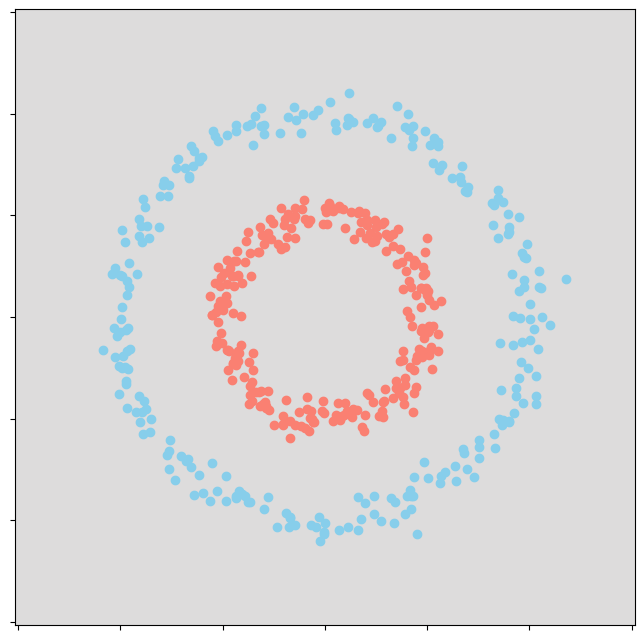

In [ ]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

X, Y = make_circles(n_samples=500, factor=0.5, noise=0.05)

#resolucion del mapa de prediccion
res = 100

#coordenadas del mapa

_x0 = np.linspace(-1.5, 1.5, res)
_x1 = np.linspace(-1.5, 1.5, res)

_pX = np.array(np.meshgrid(_x0, _x1)).T.reshape(-1,2)

_pY = np.zeros((res, res))+0.5

plt.figure(figsize=(8,8))
plt.pcolormesh(_x0, _x1, _pY, cmap="coolwarm", vmin=0, vmax=1)

plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")
plt.tick_params(labelbottom = False, labelleft=False)



#Tensorflow

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

from matplotlib import animation
from IPython.core.display import display, HTML

#Definition
iX = tf.placeholder('float', shape=[None, X.shape[1]])
iY = tf.placeholder('float', shape=[None])

lr = 0.01 # learning rate
nn = [2, 16, 8, 1] # número de neuronas por capa.

# Capa 1
W1 = tf.Variable(tf.random_normal([nn[0], nn[1]]), name='Weights_1')
b1 = tf.Variable(tf.random_normal([nn[1]]), name='bias_1')
l1 = tf.nn.relu(tf.add(tf.matmul(iX, W1), b1))

# Capa 2
W2 = tf.Variable(tf.random_normal([nn[1], nn[2]]), name='Weights_2')
b2 = tf.Variable(tf.random_normal([nn[2]]), name='bias_2')
l2 = tf.nn.relu(tf.add(tf.matmul(iX, W1), b1))

# Capa 3
# W3 = tf.Variable(tf.random_normal([nn[0], nn[1]]), name='Weights_1')
W3 = tf.transpose(tf.Variable(tf.random_normal([nn[0], nn[1]]), name='Weights_1_1'))
b3 = tf.Variable(tf.random_normal([nn[1]]), name='bias_1')
b3 = tf.reshape(b3, [-1, 1])

pY = tf.nn.sigmoid(tf.add(tf.matmul(l2, W3), b3))[:, 0]

loss = tf.losses.mean_squared_error(pY, iY)

learning_rate = 0.05

optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)
n_steps = 10000
iPY = []

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  #iteramos n pases de entrenamiento.
  for step in range(n_steps):
    _, _loss, _pY = sess.run([optimizer, loss, pY], feed_dict={ iX : X, iY : Y})


    if step % 25 == 0:
      acc = np.mean(np.round(_pY) == Y)
      # Impresión de metricas
      print('Step', step, '/', n_steps, ' - Loss = ', _loss, ' - ACC =', acc)
      _pY = sess.run(pY, feed_dict={iX: _pX}).reshape(res, res)
      iPY.append(_pY)

ims = []
fig = plt.figure(figsize=(10,10))
print("---Generando animación ----")

for fr in range(len(iPY)):
  im = plt.pcolormesh(_x0, _x1, iPY[fr], cmap="coolwarm", animated=True)
  plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
  plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")

  plt.tick_params(labelbottom = False, labelleft=False)
  ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
plt.close()
HTML(ani.to_html_5_video())

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 47)

#keras

In [ ]:
import tensorflow as tf
import tensorflow.keras as kr

from IPython.core.display import display, HTML


lr = 0.01   # learning rate
nn = [2, 16, 8, 1] # número de neuronas por capa.

#creamos el objeto que contendrá a nuestra red neuronal, como
# secuencia de capas.
model = kr.Sequential()

#añadimos la capa 1
l1 = model.add(kr.layers.Dense(nn[1], activation='relu'))

#añadimos la capa 2
l2 = model.add(kr.layers.Dense(nn[2], activation='relu'))

#añadimos la capa 3
l3 = model.add(kr.layers.Dense(nn[3], activation='sigmoid'))

#compilamos el modelo, definiendo la función de coste y le optimizador.
model.compile(loss='mse', optimizer=kr.optimizers.SGD(lr=0.05), metrics=['acc'])
# y se entrena el modelo. los callbacks
model.fit(X, Y, epochs=100)

NotImplementedError: numpy() is only available when eager execution is enabled.